# Analysis of road accident data in Kazakhstan

#### Project structure.
   #### 1. Imports & preparing the table.
    1-1. Filling "Privileges" column
    1-2. Filling "Accident_region" column based on "City" & removing outliers
    1-3. Filling "Loss_amount" column referring to the average losses
#### 2. Data analysis:
    2-1. Analysis of accident frequency depending on age group
    2-2. Analysis of accident frequency depending on driving experience
    2-3. Analysis of accident frequency depending on gender group
    2-4. Analysis of accident frequency depending on region
    2-5. Analysis of accident frequency depending on steering wheel position
    2-6. Analysis of accident frequency depending on citizenship (Without Kazakhstan)
    2-7. Analysis of accident frequency depending on the vehicle (excluding cars)
    2-8. Analysis of accident frequency depending on vehicle brands
    2-9. Analysis of accident frequency depending on color
    2-10. Analysis of accident frequency depending on privileges
    2-11. Analysis of descriptive statistics
#### 3. Conclusion.
    3-1. Final report 

#### Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the table

In [5]:
excel_file_path = r'C:\Users\user\Desktop\kz_road_accident\kz_road_accident.xlsx'
df = pd.read_excel(excel_file_path)
df

,Unique number,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Color,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,2000-12-01,Слева,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,2001-12-01,Слева,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,2005-12-01,Слева,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,1992-12-01,Слева,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN
4,00a216cee7321c4514ecbe9cbd97a4eb,48,Казахстан,18,М,9,Затобольск,С4,Audi,Легковые автомобили,1995-12-01,Слева,серый металлик,28.05.2013-27.05.2014,8257,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,c6a3b53d633ff4155492e2e19b9a8010,57,Казахстан,35,М,8,Павлодар,Нива 212300-55,Шевроле,Легковые автомобили,2012-12-01,Слева,серый металлик,12.06.2013-10.04.2014,6976,NaN,NaN,NaN
10905,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Нива 212300-55I,Шевроле,Легковые автомобили,2012-01-01,Слева,серебристый,16.06.2013-15.06.2014,6400,NaN,NaN,NaN
10906,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Нива 212300-55I,Шевроле,Легковые автомобили,2010-12-01,Слева,снежная королева,18.06.2013-17.06.2014,10053,NaN,NaN,NaN
10907,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Шевроле,Легковые автомобили,2011-12-01,Слева,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,NaN,NaN


#### 1-1. Filling "Privileges" column

In [6]:
df['Privileges'].fillna('No privileges', inplace=True)
df[['Privileges']]

,Privileges
0,No privileges
1,No privileges
2,No privileges
3,No privileges
4,No privileges
...,...
10904,No privileges
10905,No privileges
10906,No privileges
10907,Инвалид


#### 1-2. Filling "Accident_region" column based on "City" 

In [7]:
df.loc[df['Accident_region'].isnull(), 'Accident_region'] = df['City']
df[['City', 'Accident_region']]

,City,Accident_region
0,Алматы,Алматы
1,Нур-Султан,Нур-Султан
2,Алматы,Алматы
3,Нур-Султан,Нур-Султан
4,Затобольск,Затобольск
...,...,...
10904,Павлодар,Павлодар
10905,Петропавловск,Петропавловск
10906,Костанай,Костанай
10907,Усть-Каменогорск,Усть-Каменогорск


#### 1-2. Removing outliers from the "Accident_region" column.

In [8]:
region_counts = df['Accident_region'].value_counts()
threshold = 20
df = df[df['Accident_region'].isin(region_counts[region_counts >= threshold].index)]
df[['Accident_region']]

,Accident_region
0,Алматы
1,Нур-Султан
2,Алматы
3,Нур-Султан
5,"Атбасар,Атбасар"
...,...
10904,Павлодар
10905,Петропавловск
10906,Костанай
10907,Усть-Каменогорск


#### 1-3. Filling "Loss_amount" column referring to the average losses

In [9]:
amount_of_loss = df['Loss_amount'].mean().round()
df.loc[df['Loss_amount'].isnull(), 'Loss_amount'] = amount_of_loss
df[['Loss_amount']]


,Loss_amount
0,364824.0
1,364824.0
2,364824.0
3,364824.0
5,364824.0
...,...
10904,364824.0
10905,364824.0
10906,364824.0
10907,364824.0


In [10]:
print(amount_of_loss, 'tenge')

364824.0 tenge


#### Prepared table for the data analysis:

In [11]:
df

,Unique number,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Color,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount
0,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,2000-12-01,Слева,красный,14.06.2013-13.06.2014,17625,No privileges,Алматы,364824.0
1,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,2001-12-01,Слева,синий,19.07.2013-18.07.2014,8484,No privileges,Нур-Султан,364824.0
2,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,2005-12-01,Слева,красный,07.06.2013-06.06.2014,8031,No privileges,Алматы,364824.0
3,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,1992-12-01,Слева,серебристый металлик архивный,30.05.2013-29.11.2013,6709,No privileges,Нур-Султан,364824.0
5,00c017c98fad3a18151e93c9f264a97d,51,Казахстан,19,М,3,"Атбасар,Атбасар",100,Audi,Легковые автомобили,1982-12-01,Слева,серый,29.05.2013-28.11.2013,4025,No privileges,"Атбасар,Атбасар",364824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,c6a3b53d633ff4155492e2e19b9a8010,57,Казахстан,35,М,8,Павлодар,Нива 212300-55,Шевроле,Легковые автомобили,2012-12-01,Слева,серый металлик,12.06.2013-10.04.2014,6976,No privileges,Павлодар,364824.0
10905,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Нива 212300-55I,Шевроле,Легковые автомобили,2012-01-01,Слева,серебристый,16.06.2013-15.06.2014,6400,No privileges,Петропавловск,364824.0
10906,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Нива 212300-55I,Шевроле,Легковые автомобили,2010-12-01,Слева,снежная королева,18.06.2013-17.06.2014,10053,No privileges,Костанай,364824.0
10907,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Шевроле,Легковые автомобили,2011-12-01,Слева,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,Усть-Каменогорск,364824.0


# Data analysis:

#### 2-1. Analysis of accident frequency depending on age group

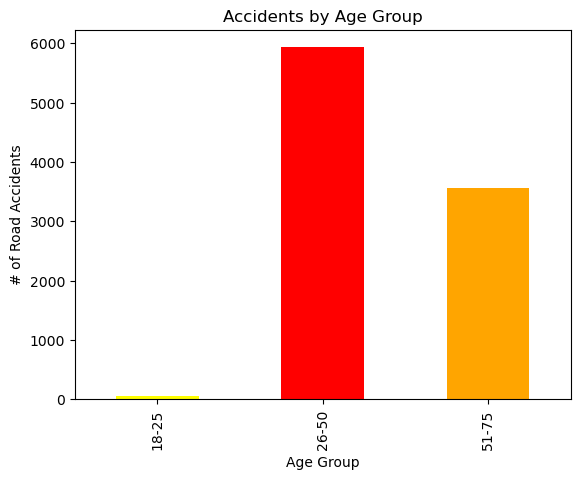

In [13]:
bins = [18, 25, 50, 75]
labels = ['18-25', '26-50', '51-75']
df.loc[:, 'Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
colors = ['yellow', 'red', 'orange']
age_group_counts = df['Age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', xlabel='Age Group', ylabel='# of Road Accidents', title='Accidents by Age Group', color=colors)
plt.show()

In [14]:
age_group_counts

Age_group
18-25      56
26-50    5929
51-75    3559
Name: count, dtype: int64

#### 2-2. Analysis of accident frequency depending on driving experience

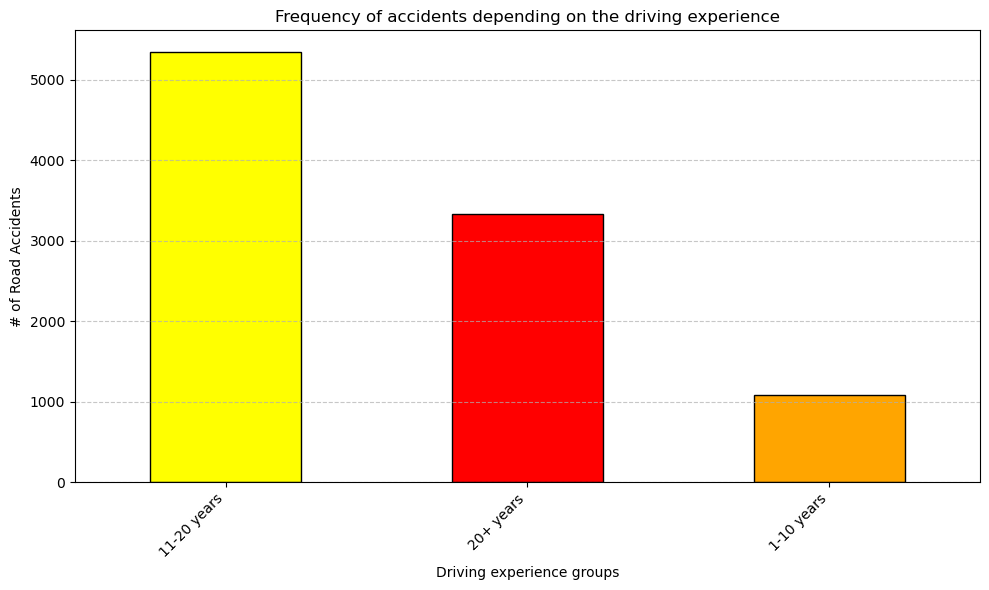

In [16]:
bins = [0, 10, 20, float('inf')]
labels = ['1-10 years', '11-20 years', '20+ years']
colors = ['yellow', 'red', 'orange']

df.loc[:, 'Driving_experience_group'] = pd.cut(df['Driving_experience'], bins=bins, labels=labels, right=False)
accident_counts = df['Driving_experience_group'].value_counts()
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Driving experience groups')
plt.ylabel('# of Road Accidents')
plt.title('Frequency of accidents depending on the driving experience')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
accident_counts

Driving_experience_group
11-20 years    5345
20+ years      3328
1-10 years     1088
Name: count, dtype: int64

#### 2-3. Analysis of accident frequency depending on gender group

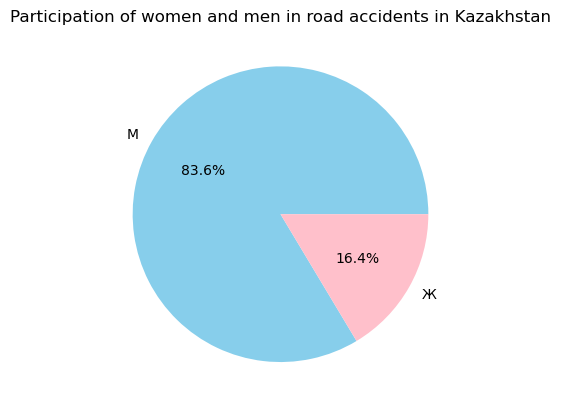

In [18]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Participation of women and men in road accidents in Kazakhstan')
plt.show()


In [19]:
gender_counts

Gender
М    8160
Ж    1601
Name: count, dtype: int64

#### 2-4. Analysis of accident frequency depending on region

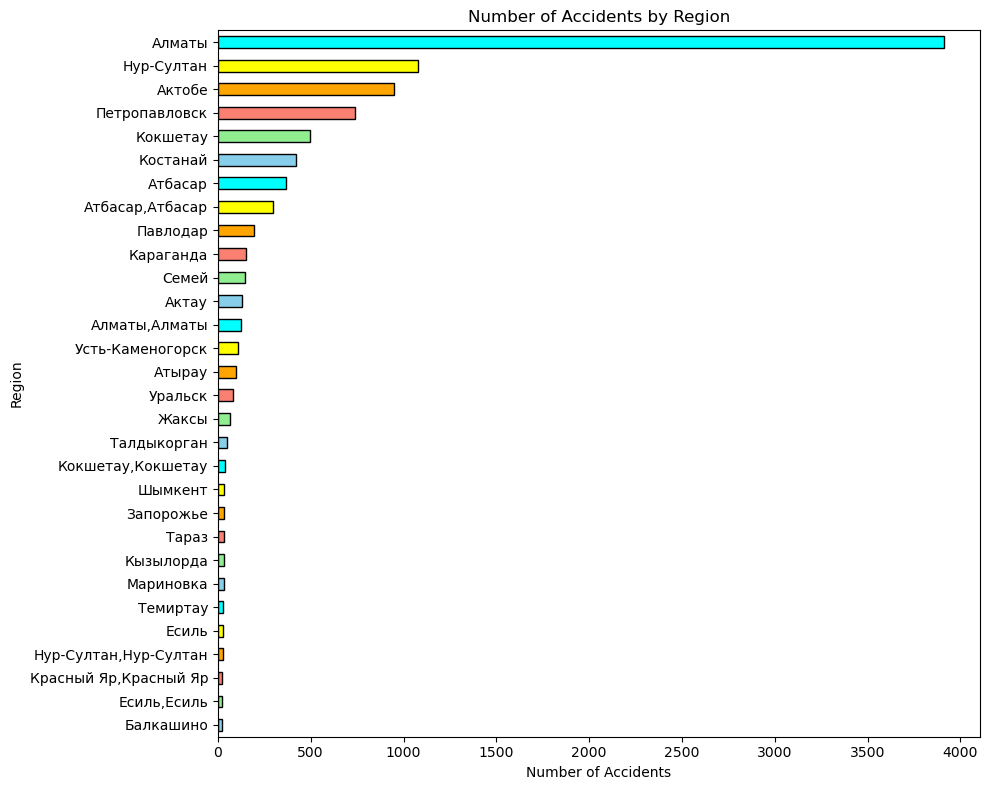

In [20]:
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'cyan']
region_counts = df['Accident_region'].value_counts()
plt.figure(figsize=(10, 8)) 
region_counts.sort_values().plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Number of Accidents')
plt.ylabel('Region')
plt.title('Number of Accidents by Region')
plt.tight_layout()  
plt.show()


In [21]:
region_counts

Accident_region
Алматы                   3910
Нур-Султан               1080
Актобе                    947
Петропавловск             737
Кокшетау                  498
Костанай                  419
Атбасар                   368
Атбасар,Атбасар           296
Павлодар                  197
Караганда                 154
Семей                     148
Актау                     129
Алматы,Алматы             127
Усть-Каменогорск          108
Атырау                    100
Уральск                    84
Жаксы                      63
Талдыкорган                47
Кокшетау,Кокшетау          36
Шымкент                    35
Запорожье                  34
Тараз                      33
Кызылорда                  33
Мариновка                  31
Темиртау                   27
Есиль                      26
Нур-Султан,Нур-Султан      26
Красный Яр,Красный Яр      24
Есиль,Есиль                22
Балкашино                  22
Name: count, dtype: int64

#### 2-5. Analysis of accident frequency depending on steering wheel position

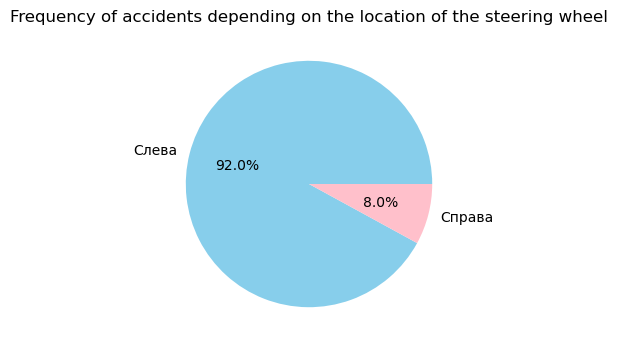

In [22]:
accident_counts = df['Steering_wheel_location'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Frequency of accidents depending on the location of the steering wheel')
plt.show()

In [23]:
accident_counts

Steering_wheel_location
Слева     8984
Справа     777
Name: count, dtype: int64

#### 2-6. Analysis of accident frequency depending on citizenship (Without Kazakhstan)

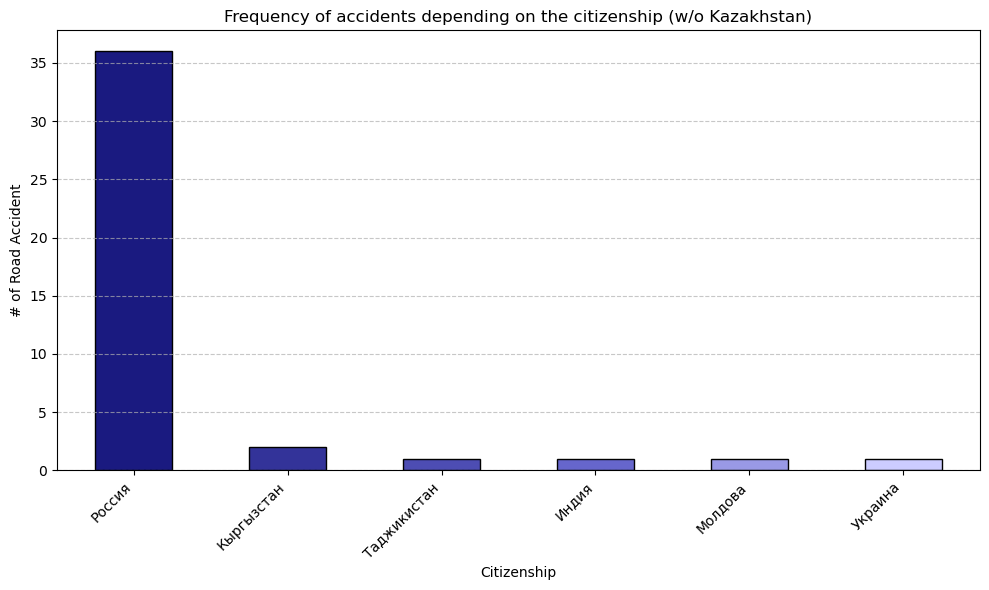

In [24]:
colors = [(0.1, 0.1, 0.5, 1),    
        (0.2, 0.2, 0.6, 1),    
        (0.3, 0.3, 0.7, 1),    
        (0.4, 0.4, 0.8, 1),    
        (0.6, 0.6, 0.9, 1),    
        (0.8, 0.8, 1.0, 1)]    

df_filtered = df[df['Citizenship'] != 'Казахстан']
accident_counts = df_filtered['Citizenship'].value_counts()
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Citizenship')
plt.ylabel('# of Road Accident')
plt.title('Frequency of accidents depending on the citizenship (w/o Kazakhstan)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
accident_counts

Citizenship
Россия         36
Кыргызстан      2
Таджикистан     1
Индия           1
Молдова         1
Украина         1
Name: count, dtype: int64

#### 2-7. Analysis of accident frequency depending on the vehicle (excluding cars)

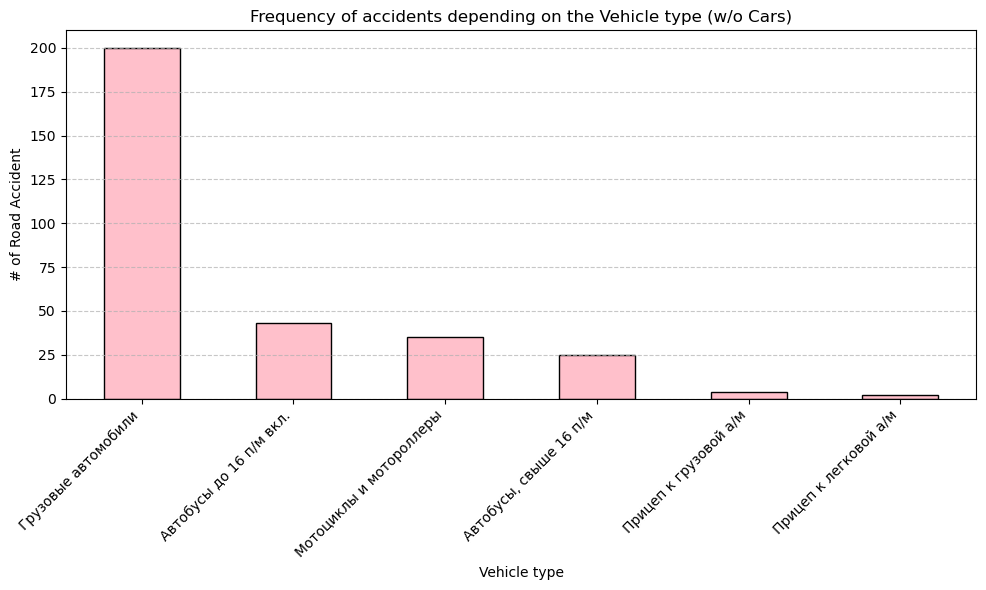

In [26]:
df_filtered = df[df['Vehicle_type '] != 'Легковые автомобили']
accident_counts_vehicle = df_filtered['Vehicle_type '].value_counts()
plt.figure(figsize=(10, 6))
accident_counts_vehicle.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Vehicle type')
plt.ylabel('# of Road Accident')
plt.title('Frequency of accidents depending on the Vehicle type (w/o Cars)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
accident_counts_vehicle

Vehicle_type 
Грузовые автомобили        200
Автобусы до 16 п/м вкл.     43
Мотоциклы и мотороллеры     35
Автобусы, свыше 16 п/м      25
Прицеп к грузовой а/м        4
Прицеп к легковой а/м        2
Name: count, dtype: int64

####  2-8. Analysis of accident frequency depending on vehicle brands

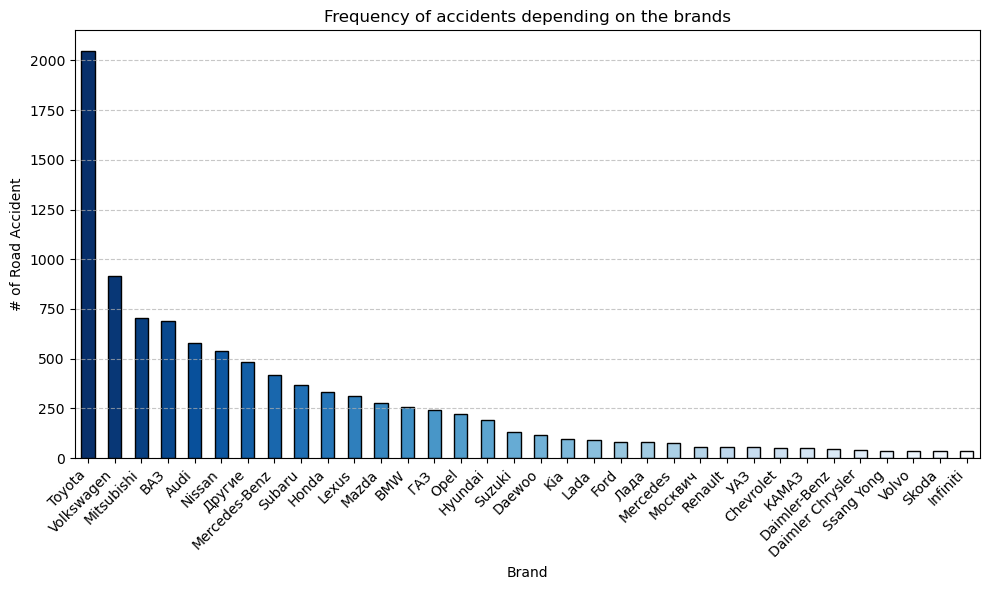

In [28]:
accident_counts_brand = df['Brand'].value_counts()
rare_brands = accident_counts_brand[accident_counts_brand < 30].index.tolist()
df.loc[df['Brand'].isin(rare_brands), 'Brand'] = 'Другие'
accident_counts_brand_updated = df['Brand'].value_counts()
colors = plt.cm.Blues(np.linspace(1, 0, len(accident_counts_brand_updated)))

plt.figure(figsize=(10, 6))
accident_counts_brand_updated.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('# of Road Accident')
plt.title('Frequency of accidents depending on the brands')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2-9. Analysis of accident frequency depending on color

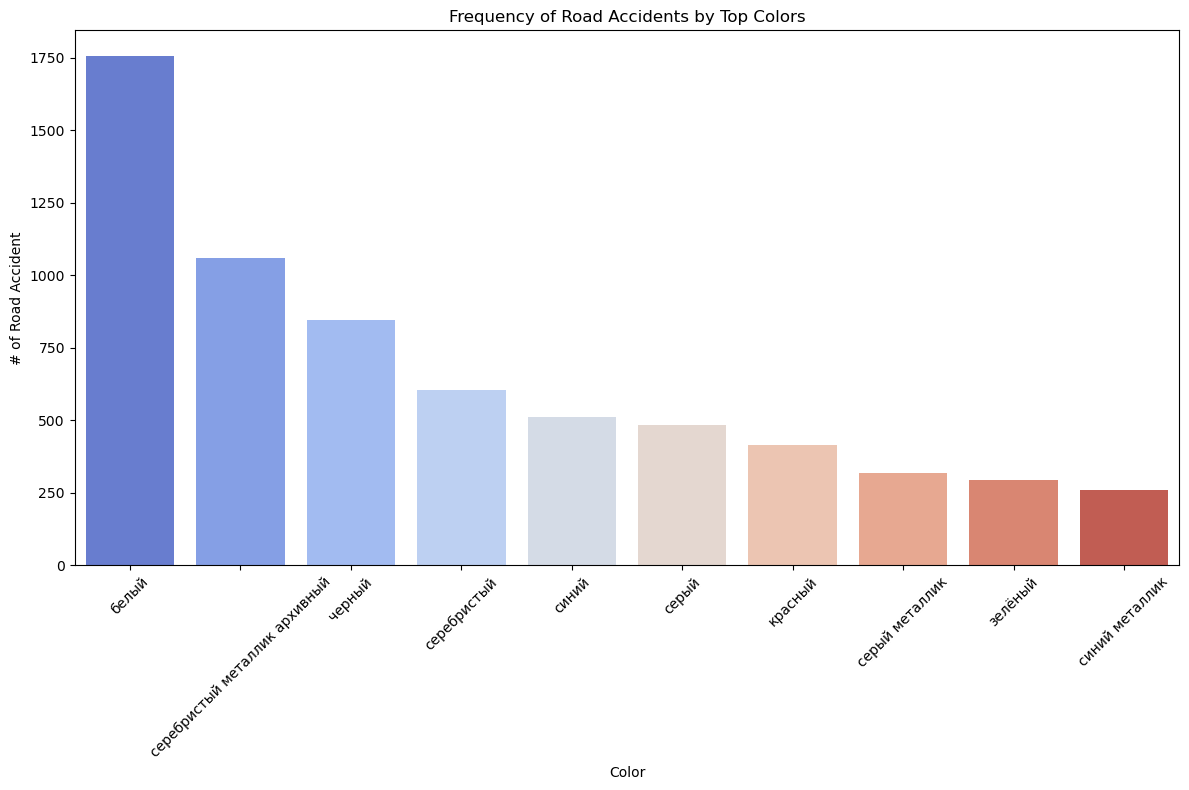

In [29]:
top_colors = df['Color'].value_counts().nlargest(10).index
df_filtered = df[df['Color'].isin(top_colors)]
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='Color', palette='coolwarm', order=top_colors)
plt.title('Frequency of Road Accidents by Top Colors')
plt.xlabel('Color')
plt.ylabel('# of Road Accident')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2-10. Analysis of accident frequency depending on privileges

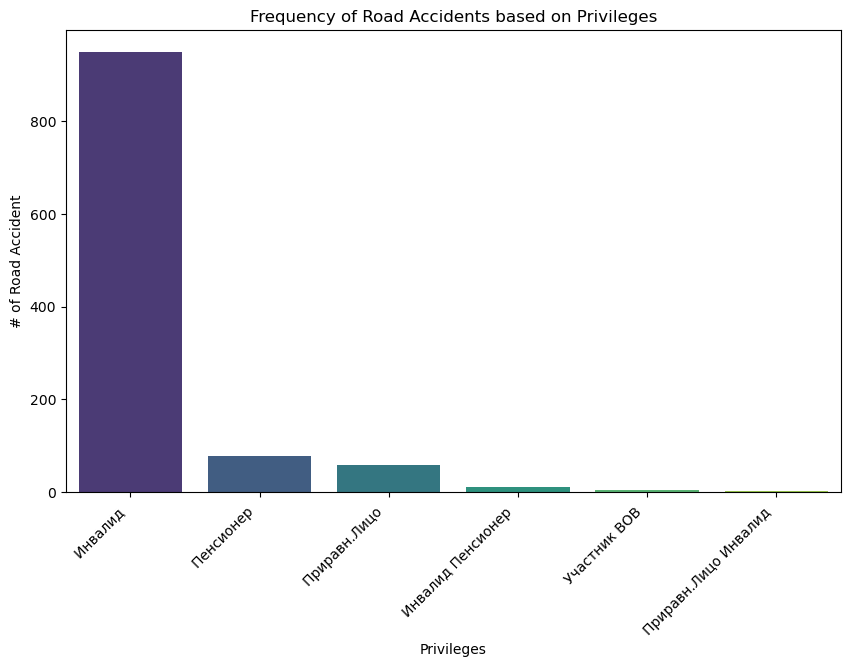

In [30]:
privileged_accidents = df[df['Privileges'] != 'No privileges']
plt.figure(figsize=(10, 6))
sns.countplot(data=privileged_accidents, x='Privileges', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Privileges')
plt.ylabel('# of Road Accident')
plt.title('Frequency of Road Accidents based on Privileges')
plt.show()

In [31]:
privileged_accidents

,Unique number,Age,Citizenship,Driving_experience,Gender,Bonus_Malus,City,Model,Brand,Vehicle_type,Year_of_manufacture,Steering_wheel_location,Color,Insurance_period,Insurance_premium,Privileges,Accident_region,Loss_amount,Age_group,Driving_experience_group
14,054e2c2ac8a318c244fdc9be0582fead,69,Казахстан,20,М,9,"Атбасар,Атбасар",100,Audi,Легковые автомобили,1985-01-01,Слева,коричневый,20.06.2013-19.06.2014,5589,Инвалид,"Атбасар,Атбасар",364824.0,51-75,20+ years
16,05bff51d1afd7c91663a0bb876fb92f7,60,Казахстан,10,М,7,Атбасар,B4,Audi,Легковые автомобили,1994-12-01,Слева,синий,07.06.2013-06.06.2014,7545,Инвалид,Атбасар,364824.0,51-75,11-20 years
17,05fda6d1cf481d7710158bd6fbef063c,78,Казахстан,35,М,9,Нур-Султан,80,Audi,Легковые автомобили,1986-01-01,Слева,серый,07.06.2013-06.06.2014,5822,Инвалид,Нур-Султан,364824.0,NaN,20+ years
36,0c0fb5254a24e9593f08ff8d5d5a88ac,51,Казахстан,20,М,9,Атбасар,С4,Audi,Легковые автомобили,1995-01-01,Слева,синий,02.07.2013-01.07.2014,2795,Инвалид,Атбасар,364824.0,51-75,20+ years
73,1b7ce576d5c5290791ce22906d81c35e,71,Казахстан,53,М,8,Костанай,С4,Audi,Легковые автомобили,1992-12-01,Слева,белый,21.05.2013-20.11.2013,2787,Инвалид,Костанай,364824.0,51-75,20+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10890,9444422cf795f0f6a4d02236c644fa6f,78,Казахстан,37,М,7,Балкашино,ИМЗ 810310,Другие,Мотоциклы и мотороллеры,1988-01-01,Слева,синий,11.06.2013-10.06.2014,1528,Инвалид,Балкашино,364824.0,NaN,20+ years
10901,8c2a8b406ddd07a71cc1e5321f825dd5,70,Россия,19,М,7,Усть-Каменогорск,Нива 21230I,Другие,Легковые автомобили,2004-12-01,Слева,снежная королева,30.06.2013-29.06.2014,5928,Инвалид,Усть-Каменогорск,364824.0,51-75,11-20 years
10902,8ec07db5eb9e607643a78106c38076b9,60,Казахстан,23,М,8,Усть-Каменогорск,Нива,Другие,Легковые автомобили,2004-12-01,Слева,серебристый металлик архивный,04.06.2013-03.06.2014,5557,Инвалид,Усть-Каменогорск,364824.0,51-75,20+ years
10907,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Другие,Легковые автомобили,2011-12-01,Слева,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,Усть-Каменогорск,364824.0,51-75,20+ years


#### 2-11. Analysis of descriptive statistics

In [457]:
selected_columns = ['Age', 'Driving_experience', 'Insurance_premium', 'Loss_amount']
df[selected_columns].describe()

,Age,Driving_experience,Insurance_premium,Loss_amount
count,9761.000000,9761.000000,9761.000000,9.761000e+03
mean,47.388280,18.084008,11321.710480,3.648240e+05
std,12.774785,8.758305,5781.744771,5.301417e+04
min,24.000000,0.000000,66.000000,1.572100e+04
25%,37.000000,12.000000,6852.000000,3.648240e+05
50%,46.000000,18.000000,10320.000000,3.648240e+05
75%,56.000000,20.000000,15720.000000,3.648240e+05
max,91.000000,88.000000,59669.000000,2.525000e+06


#### Final report:

Conclusion:
    The data analysis of accident frequency covers various aspects including age, driving experience, gender, region, steering wheel position, citizenship, vehicle type, brand, color, and benefits.

Key Findings:
    There is a correlation between the frequency of accidents and drivers' age, driving experience, and gender.
    The distribution of accident frequency varies across regions, possibly due to different road conditions and driving cultures.
    Differences in accident frequency exist based on vehicle brand, type, and color.
    The presence of benefit categories among drivers influences the frequency of accidents.
    Overall, the analysis provides insights into the main factors affecting accident frequency, which can be valuable for developing and implementing measures to enhance road safety and reduce accidents.